
Group Project - 10/11/2019
CLASSIFICATION - Credit Score Problem

------------

GETTING TO KNOW THE DATASET... SOME DESCRIPTIVE STATISTICS:

The complete dataset has 1700 rows and 28 columns.
Count, mean, median, max, min...

count    1700.000000
mean        0.050378
std         0.161910
min        -0.661715
25%        -0.005693
50%         0.034000
75%         0.083004
max         2.277229
Name: Sales/Revenues, dtype: float64
 
count    1700.000000
mean        0.026007
std         0.273768
min        -0.794722
25%        -0.020028
50%         0.003403
75%         0.025595
max         3.202713
Name: Gross Margin, dtype: float64
 
count    1700.000000
mean        0.068718
std         0.237365
min        -0.782254
25%        -0.022640
50%         0.049482
75%         0.124533
max         3.542425
Name: EBITDA, dtype: float64
 
count    1700.000000
mean        0.021074
std         0.189025
min        -0.805153
25%        -0.042771
50%         0.011134
75%         0.060566
max         4.1

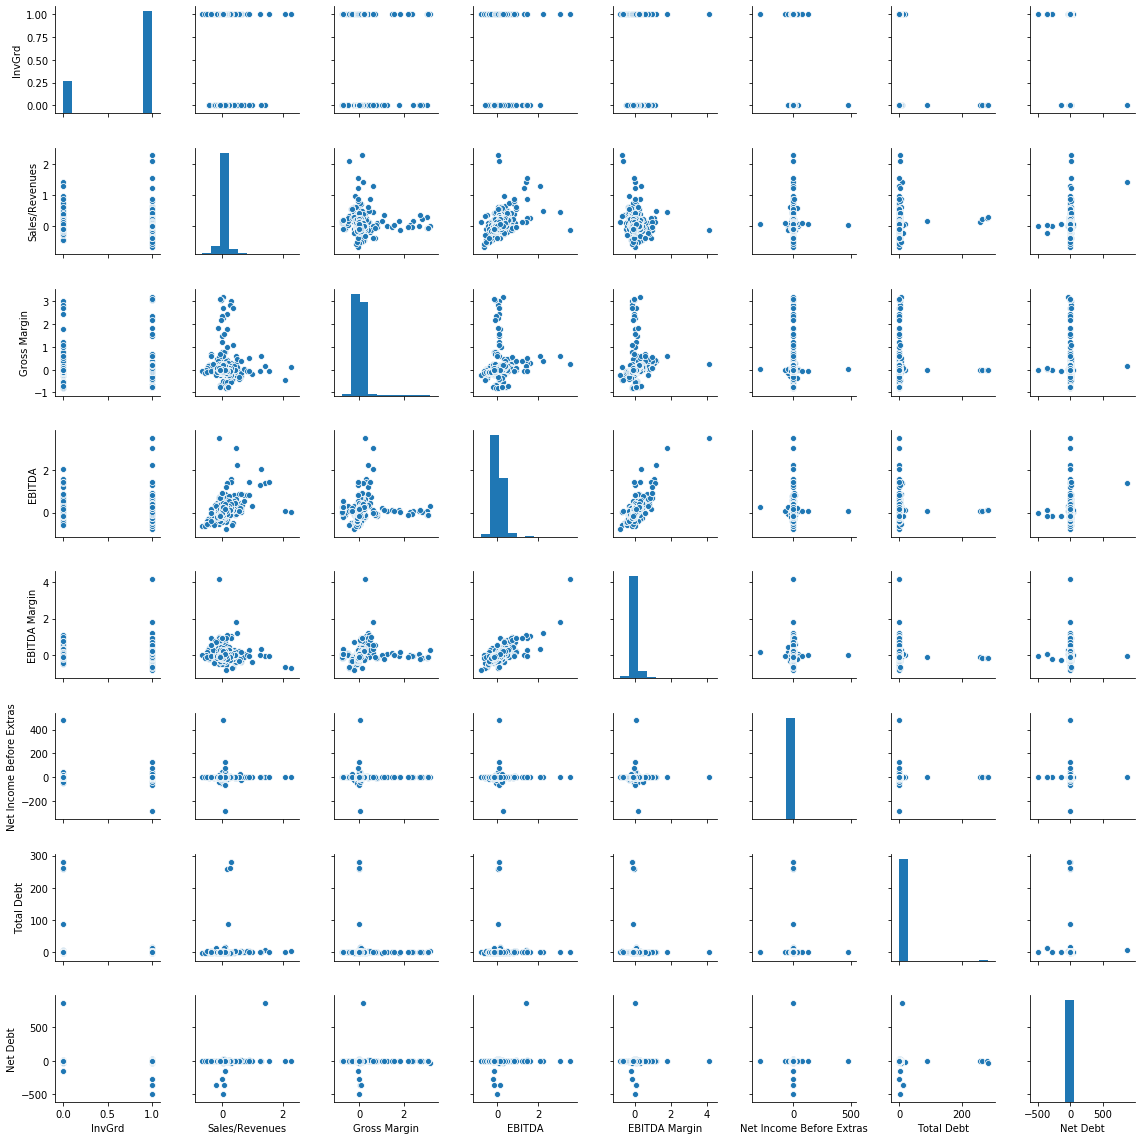

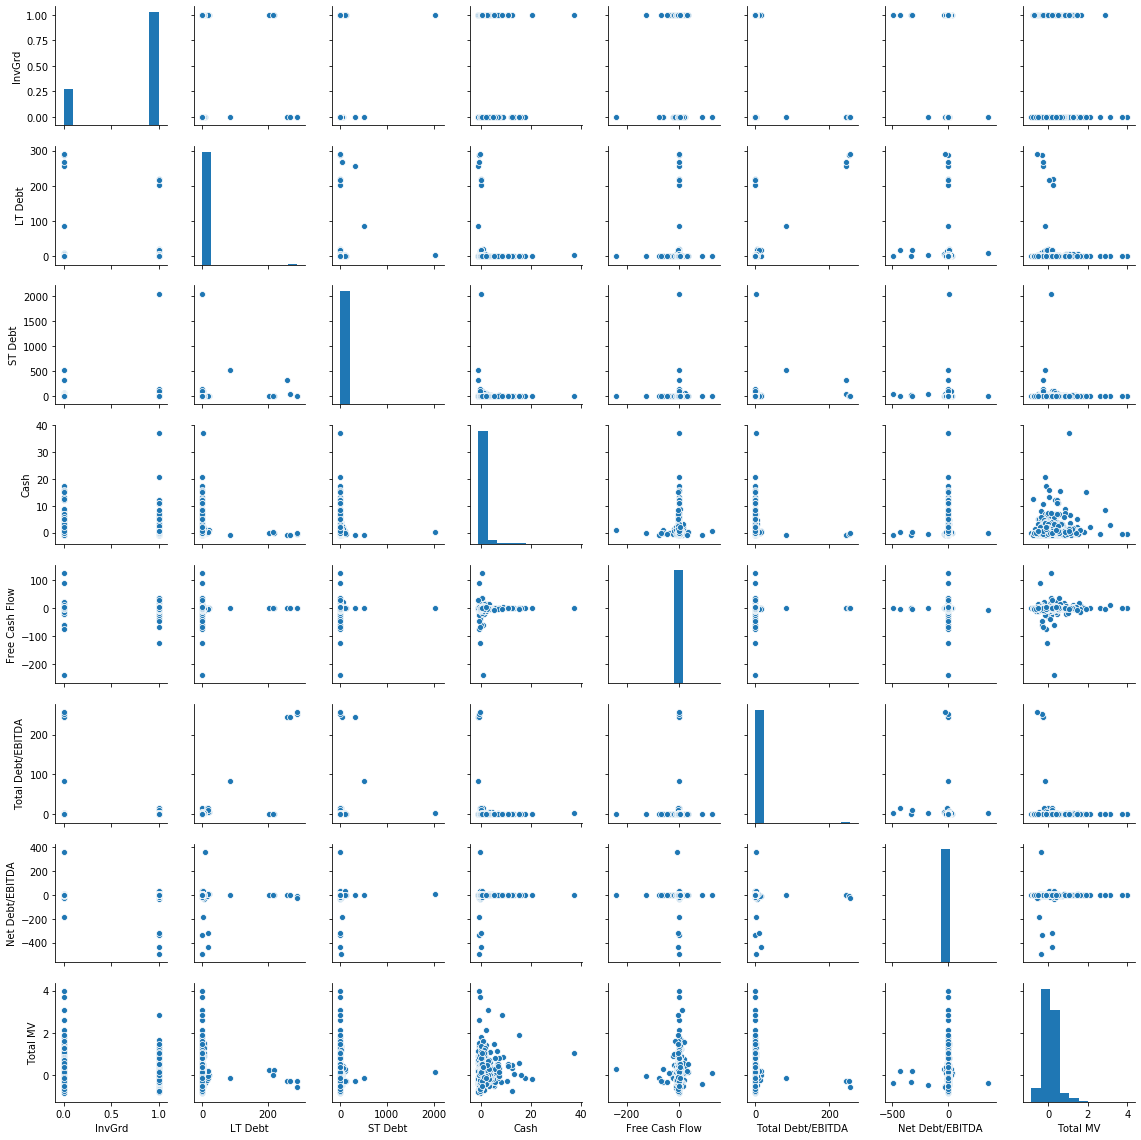

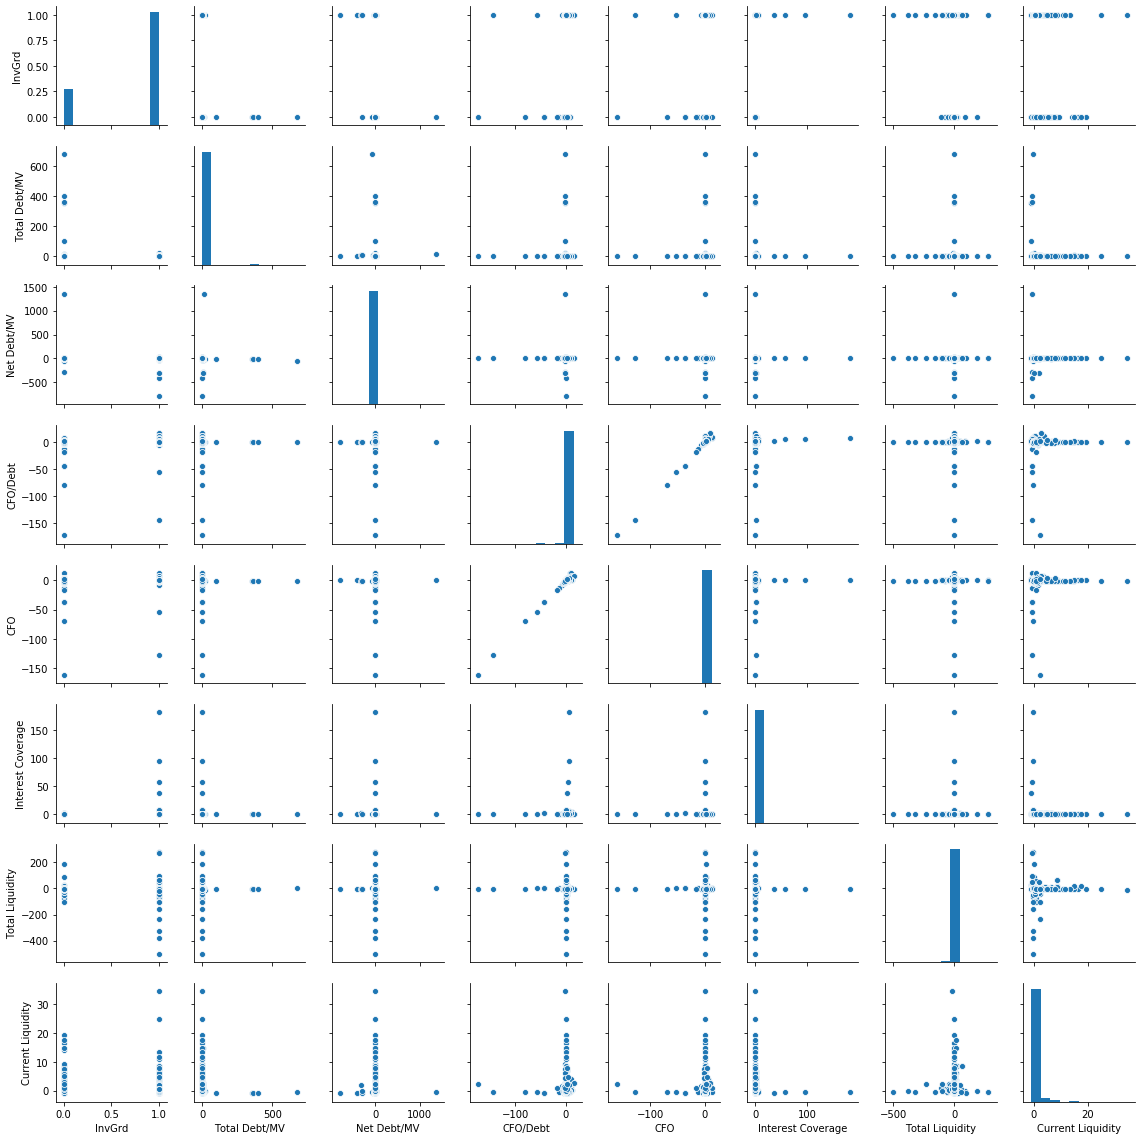

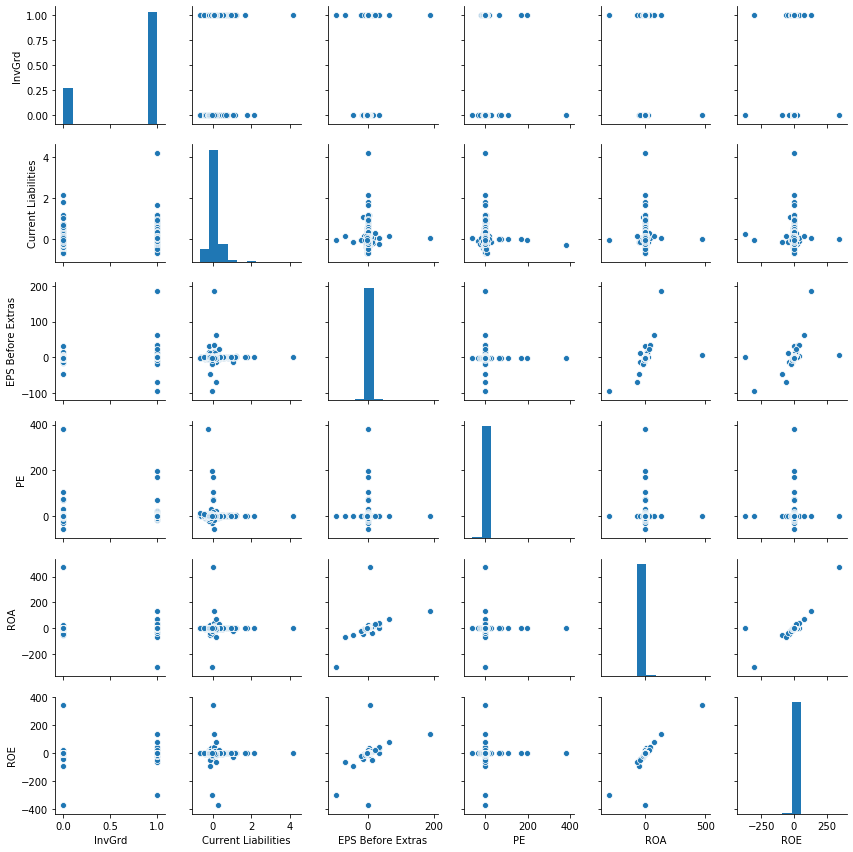


------------

The dataset (without outliers) has 468 rows and 29 columns.
Count, mean, median, max, min...

count    468.000000
mean       0.030262
std        0.050355
min       -0.136054
25%        0.002083
50%        0.030384
75%        0.060049
max        0.182925
Name: Sales/Revenues, dtype: float64
 
count    468.000000
mean       0.004636
std        0.030829
min       -0.087597
25%       -0.009533
50%        0.005649
75%        0.021457
max        0.088659
Name: Gross Margin, dtype: float64
 
count    468.000000
mean       0.038521
std        0.070474
min       -0.187694
25%       -0.006388
50%        0.038402
75%        0.088313
max        0.251597
Name: EBITDA, dtype: float64
 
count    468.000000
mean       0.008518
std        0.056826
min       -0.164848
25%       -0.022188
50%        0.012958
75%        0.041149
max        0.196711
Name: EBITDA Margin, dtype: float64
 
count    468.000000
mean       0.067544
std        0.193603
min       -0.531760
25%       -0.051620
50%   

In [71]:
print ("\nGroup Project - 10/11/2019")
print ("CLASSIFICATION - Credit Score Problem")
print("\n------------\n")

# 1) IMPORTING LIBRARIES #

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from scipy import stats

# 2) SETTING PARAMETERS #

SEED = 18

# 3) IMPORTING THE DATA #

print ("GETTING TO KNOW THE DATASET... SOME DESCRIPTIVE STATISTICS:\n")

# Import csv file
df = pd.read_csv('/Users/carolinacmleite/Downloads/MLF_GP1_CreditScore.csv',header=0)
print('The complete dataset has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns.')

# Creating a new column with a new multiclass target. We're clustering:
# AAA's and AA's / BAA's / BA's / B's / C's
conditions = [
    (df['Rating'] == 'Aaa') | (df['Rating'] == 'Aa2') | (df['Rating'] == 'Aa3'),
    (df['Rating'] == 'A1') | (df['Rating'] == 'A2') | (df['Rating'] == 'A3'),
    (df['Rating'] == 'Baa1') | (df['Rating'] == 'Baa2') | (df['Rating'] == 'Baa3'),
    (df['Rating'] == 'Ba1') | (df['Rating'] == 'Ba2') | (df['Rating'] == 'Ba3'),
    (df['Rating'] == 'B1') | (df['Rating'] == 'B2') | (df['Rating'] == 'B3') | (df['Rating'] == 'Caa1')]
choices = [1, 2, 3, 4, 5]
#choices = ['01 - AAA/AA', '02 - A', '03 - BAA', '04 - BA', '05 - B/CAA']
df['Rating2'] = np.select(conditions, choices)

# 4) EDA #

# Descriptive Statistics: count, mean, median, min, max, missing values etc

# DS of Original Variables
print ("Count, mean, median, max, min...\n")
for x in range(-29, 0):
    lastvar = df[df.columns[x]]
    print (lastvar.describe())
    print(" ")
print("------------\n")

# Scatterplot Matrices
print ("Scatterplot Matrices\n")
cols_num = [
'InvGrd'
,'Sales/Revenues'
,'Gross Margin'
,'EBITDA'
,'EBITDA Margin'
,'Net Income Before Extras'
,'Total Debt'
,'Net Debt'
]
sns.pairplot(df[cols_num], height=2)
plt.show()
print(" ")
cols_num = [
'InvGrd'
,'LT Debt'
,'ST Debt'
,'Cash'
,'Free Cash Flow'
,'Total Debt/EBITDA'
,'Net Debt/EBITDA'
,'Total MV'
]
sns.pairplot(df[cols_num], height=2)
plt.show()
print(" ")
cols_num = [
'InvGrd'
,'Total Debt/MV'
,'Net Debt/MV'
,'CFO/Debt'
,'CFO'
,'Interest Coverage'
,'Total Liquidity'
,'Current Liquidity'
]
sns.pairplot(df[cols_num], height=2)
plt.show()
print(" ")
cols_num = [
'InvGrd'
,'Current Liabilities'
,'EPS Before Extras'
,'PE'
,'ROA'
,'ROE'
]
sns.pairplot(df[cols_num], height=2)
plt.show()
print("\n------------\n")

# What if we delete the outliers using the IQR for each variable?
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df2 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('The dataset (without outliers) has ' + str(df2.shape[0]) + ' rows and ' + str(df2.shape[1]) + ' columns.')

# DS of Dataset without Outliers
print ("Count, mean, median, max, min...\n")
for x in range(-29, 0):
    lastvar = df2[df2.columns[x]]
    print (lastvar.describe())
    print(" ")
print("------------\n")

# 5) MANIPULATING THE DATASETS #

# Drop the target columns (InvGrd and Rating) from the features array
X = df.drop('InvGrd', axis=1) # Dropping InvGrd
X = X.drop('Rating',axis=1) # Dropping Rating
X = X.drop('Rating2',axis=1) # Dropping Rating2
# Extract the targets to their own arrays
y_bin = df['InvGrd'] # Extracting InvGrd
y_mlt = df['Rating2'] # Extracting Rating2

# Printing number of rows and columns
print('The features dataset has ' + str(X.shape[0]) + ' rows and ' + str(X.shape[1]) + ' columns.')
print('\nThe binary target has ' + str(y_bin.shape[0]) + ' rows and the following domain:\n')
print(y_bin.value_counts(dropna = False).sort_index())
print('\nThe original multiclass target has ' + str(df['Rating'].shape[0]) + ' rows and the following domain:\n')
print(df['Rating'].value_counts(dropna = False).sort_index()) 
print('\nThe clustered multiclass target has ' + str(y_mlt.shape[0]) + ' rows and the following domain:\n')
print(y_mlt.value_counts(dropna = False).sort_index()) 
print("\n------------\n")

# 6) MODELING WITH BINARY TARGET #

print ("MODELING WITH THE BINARY TARGET\n")

# Splitting train and test samples #
X_train, X_test, y_bin_train, y_bin_test = train_test_split(X, y_bin, test_size = 0.15, random_state = SEED)

# Standardizing the features (mainly because of the Logistic Regression and the KNN)
sc_X = preprocessing.StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

# First attempt: we'll try different classifiers with default parameters to get a baseline idea of the performance
# and see which one is more "promising"

# Logistic Regression with penalization L2
model_lr2 = LogisticRegression(random_state=SEED,penalty='l2',solver='lbfgs')
accuracy = cross_val_score(model_lr2, X_train, y_bin_train, cv=10) 
print('The accuracy for the Logistic Regression (with L2 penalization) is: %0.3f (+/-%0.03f)' % (accuracy.mean(), accuracy.std() * 2))
model_lr2.fit(X_train, y_bin_train)
y_bin_train_pred = model_lr2.predict(X_train)
y_bin_test_pred = model_lr2.predict(X_test)
matt_coef = matthews_corrcoef(y_bin_test, y_bin_test_pred)  
print('The Matthews Coef. for the Logistic Regression (with L2 penalization) is: ' + str(matt_coef))
# Decision Tree
model_dt = DecisionTreeClassifier(random_state=SEED)
accuracy = cross_val_score(model_dt, X_train, y_bin_train, cv=10) 
print('The accuracy for the Decision Tree is: %0.3f (+/-%0.03f)' % (accuracy.mean(), accuracy.std() * 2))
model_dt.fit(X_train, y_bin_train)
y_bin_train_pred = model_dt.predict(X_train)
y_bin_test_pred = model_dt.predict(X_test)
matt_coef = matthews_corrcoef(y_bin_test, y_bin_test_pred)  
print('The Matthews Coef. for Decision Tree is: ' + str(matt_coef))
# KNN
model_knn = KNeighborsClassifier()
accuracy = cross_val_score(model_knn, X_train, y_bin_train, cv=10) 
print('The accuracy for the KNN is: %0.3f (+/-%0.03f)' % (accuracy.mean(), accuracy.std() * 2))
model_knn.fit(X_train, y_bin_train)
y_bin_train_pred = model_knn.predict(X_train)
y_bin_test_pred = model_knn.predict(X_test)
matt_coef = matthews_corrcoef(y_bin_test, y_bin_test_pred)  
print('The Matthews Coef. for the KNN is: ' + str(matt_coef))
# SVC
model_sv = svm.SVC(random_state=SEED, gamma = 'scale', kernel='rbf')
accuracy = cross_val_score(model_sv, X_train, y_bin_train, cv=10) 
print('The accuracy for the SVC is: %0.3f (+/-%0.03f)' % (accuracy.mean(), accuracy.std() * 2))
model_sv.fit(X_train, y_bin_train)
y_bin_train_pred = model_sv.predict(X_train)
y_bin_test_pred = model_sv.predict(X_test)
matt_coef = matthews_corrcoef(y_bin_test, y_bin_test_pred)  
print('The Matthews Coef. for the SVC is: ' + str(matt_coef))

print("\nFocusing on the KNN and hypertuning the parameters:\n")

# Focusing on the KNN and hypertuning the parameters
grid_param = {
    #'weights': ['uniform', 'distance'],
    'n_neighbors': [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,150,200]
}
classifier = KNeighborsClassifier()
gd_knn = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring=make_scorer(accuracy_score),
                     cv=10,
                     n_jobs=-1,
                     return_train_score=True,
                     iid=False)

gd_knn.fit(X_train, y_bin_train)
print("Accuracies in the training samples:")
print()
means = gd_knn.cv_results_['mean_train_score']
stds = gd_knn.cv_results_['std_train_score']
fit_time = gd_knn.cv_results_['mean_fit_time']
score_time = gd_knn.cv_results_['mean_score_time']
for mean, std, params, fit, score in zip(means, stds, gd_knn.cv_results_['params'], fit_time, score_time):
    print("%0.3f (+/-%0.03f) for %r. Fit time: %0.3f s. Score time: %0.3f s"
          % (mean, std * 2, params, fit, score))
print()
print("Accuracies in the test samples:")
print()
means = gd_knn.cv_results_['mean_test_score']
stds = gd_knn.cv_results_['std_test_score']
fit_time = gd_knn.cv_results_['mean_fit_time']
score_time = gd_knn.cv_results_['mean_score_time']
for mean, std, params, fit, score in zip(means, stds, gd_knn.cv_results_['params'], fit_time, score_time):
    print("%0.3f (+/-%0.03f) for %r. Fit time: %0.3f s. Score time: %0.3f s"
          % (mean, std * 2, params, fit, score))
print()
print("Best parameters set:")
print()
print(gd_knn.best_params_)
print()
print("Classification report for the best model:")
print()
y_bin_test_pred = gd_knn.predict(X_test)
print(classification_report(y_bin_test, y_bin_test_pred))
acc_score = accuracy_score(y_bin_test, y_bin_test_pred)
matt_coef = matthews_corrcoef(y_bin_test, y_bin_test_pred)  
print('The Accuracy (test set) for the Optimized KNN is: ' + str(acc_score))
print('The Matthews Coef. (test set) for the Optimized KNN is: ' + str(matt_coef))

print("\nNow, optimizing a Random Forest (Ensemble):")

# Focusing on the Random Forest and hypertuning the parameters
grid_param = {
    'n_estimators': [20,50,100],
    'bootstrap': [True, False],
    'max_depth': [5,10,15,20,25]
}
classifier = RandomForestClassifier(random_state=SEED)
gd_rf = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring=make_scorer(accuracy_score),
                     cv=10,
                     n_jobs=-1,
                     return_train_score=True,
                     iid=False)

gd_rf.fit(X_train, y_bin_train)
print("\nAccuracies in the training samples:")
print()
means = gd_rf.cv_results_['mean_train_score']
stds = gd_rf.cv_results_['std_train_score']
fit_time = gd_rf.cv_results_['mean_fit_time']
score_time = gd_rf.cv_results_['mean_score_time']
for mean, std, params, fit, score in zip(means, stds, gd_rf.cv_results_['params'], fit_time, score_time):
    print("%0.3f (+/-%0.03f) for %r. Fit time: %0.3f s. Score time: %0.3f s"
          % (mean, std * 2, params, fit, score))
print()
print("Accuracies in the test samples:")
print()
means = gd_rf.cv_results_['mean_test_score']
stds = gd_rf.cv_results_['std_test_score']
fit_time = gd_rf.cv_results_['mean_fit_time']
score_time = gd_rf.cv_results_['mean_score_time']
for mean, std, params, fit, score in zip(means, stds, gd_rf.cv_results_['params'], fit_time, score_time):
    print("%0.3f (+/-%0.03f) for %r. Fit time: %0.3f s. Score time: %0.3f s"
          % (mean, std * 2, params, fit, score))
print()
print("Best parameters set:")
print()
print(gd_rf.best_params_)
print()
print("Classification report for the best model:")
print()
y_bin_test_pred = gd_rf.predict(X_test)
print(classification_report(y_bin_test, y_bin_test_pred))
acc_score = accuracy_score(y_bin_test, y_bin_test_pred)
matt_coef = matthews_corrcoef(y_bin_test, y_bin_test_pred)  
print('The Accuracy (test set) for the Optimized Random Forest is: ' + str(acc_score))
print('The Matthews Coef. (test set) for the Optimized Random Forest is: ' + str(matt_coef))


# 6) MODELING WITH THE MULTICLASS TARGET #

print()
print()
print ("MODELING WITH THE MULTICLASS TARGET\n")

# Splitting train and test samples #
X_train, X_test, y_mlt_train, y_mlt_test = train_test_split(X, y_mlt, test_size = 0.15, random_state = SEED)

# Standardizing the features (mainly because of the Logistic Regression and the KNN)
sc_X = preprocessing.StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

# First attempt: we'll try different classifiers with default parameters to get a baseline idea of the performance
# and see which one is more "promising"

# Logistic Regression with penalization L2
model_lr2 = LogisticRegression(random_state=SEED,solver='sag',multi_class='auto',max_iter=10000)
accuracy = cross_val_score(model_lr2, X_train, y_mlt_train, cv=10) 
print('The accuracy for the Logistic Regression (with L2 penalization) is: %0.3f (+/-%0.03f)' % (accuracy.mean(), accuracy.std() * 2))
model_lr2.fit(X_train, y_mlt_train)
y_mlt_train_pred = model_lr2.predict(X_train)
y_mlt_test_pred = model_lr2.predict(X_test)
matt_coef = matthews_corrcoef(y_mlt_test, y_mlt_test_pred)  
print('The Matthews Coef. for the Logistic Regression (with L2 penalization) is: ' + str(matt_coef))
# Decision Tree
model_dt = DecisionTreeClassifier(random_state=SEED)
accuracy = cross_val_score(model_dt, X_train, y_mlt_train, cv=10) 
print('The accuracy for the Decision Tree is: %0.3f (+/-%0.03f)' % (accuracy.mean(), accuracy.std() * 2))
model_dt.fit(X_train, y_mlt_train)
y_mlt_train_pred = model_dt.predict(X_train)
y_mlt_test_pred = model_dt.predict(X_test)
matt_coef = matthews_corrcoef(y_mlt_test, y_mlt_test_pred)  
print('The Matthews Coef. for Decision Tree is: ' + str(matt_coef))
# KNN
model_knn = KNeighborsClassifier()
accuracy = cross_val_score(model_knn, X_train, y_mlt_train, cv=10) 
print('The accuracy for the KNN is: %0.3f (+/-%0.03f)' % (accuracy.mean(), accuracy.std() * 2))
model_knn.fit(X_train, y_mlt_train)
y_mlt_train_pred = model_knn.predict(X_train)
y_mlt_test_pred = model_knn.predict(X_test)
matt_coef = matthews_corrcoef(y_mlt_test, y_mlt_test_pred)  
print('The Matthews Coef. for the KNN is: ' + str(matt_coef))
# SVC
model_sv = svm.SVC(random_state=SEED, gamma = 'scale', kernel='rbf')
accuracy = cross_val_score(model_sv, X_train, y_mlt_train, cv=10) 
print('The accuracy for the SVC is: %0.3f (+/-%0.03f)' % (accuracy.mean(), accuracy.std() * 2))
model_sv.fit(X_train, y_mlt_train)
y_mlt_train_pred = model_sv.predict(X_train)
y_mlt_test_pred = model_sv.predict(X_test)
matt_coef = matthews_corrcoef(y_mlt_test, y_mlt_test_pred)  
print('The Matthews Coef. for the SVC is: ' + str(matt_coef))

print("\nFocusing on the Decision Tree Classifier and hypertuning the parameters:\n")

# Focusing on the Decision Tree Classifier and hypertuning the parameters
grid_param = {
    'max_depth': [2,3,4,5,10,15,20,25,30,40,50,75,100]
}
classifier = DecisionTreeClassifier()
gd_dt = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring=make_scorer(accuracy_score),
                     cv=10,
                     n_jobs=-1,
                     return_train_score=True,
                     iid=False)

gd_dt.fit(X_train, y_mlt_train)
print("Accuracies in the training samples:")
print()
means = gd_dt.cv_results_['mean_train_score']
stds = gd_dt.cv_results_['std_train_score']
fit_time = gd_dt.cv_results_['mean_fit_time']
score_time = gd_dt.cv_results_['mean_score_time']
for mean, std, params, fit, score in zip(means, stds, gd_dt.cv_results_['params'], fit_time, score_time):
    print("%0.3f (+/-%0.03f) for %r. Fit time: %0.3f s. Score time: %0.3f s"
          % (mean, std * 2, params, fit, score))
print()
print("Accuracies in the test samples:")
print()
means = gd_dt.cv_results_['mean_test_score']
stds = gd_dt.cv_results_['std_test_score']
fit_time = gd_dt.cv_results_['mean_fit_time']
score_time = gd_dt.cv_results_['mean_score_time']
for mean, std, params, fit, score in zip(means, stds, gd_dt.cv_results_['params'], fit_time, score_time):
    print("%0.3f (+/-%0.03f) for %r. Fit time: %0.3f s. Score time: %0.3f s"
          % (mean, std * 2, params, fit, score))
print()
print("Best parameters set:")
print()
print(gd_dt.best_params_)
print()
print("Classification report for the best model:")
print()
y_mlt_test_pred = gd_dt.predict(X_test)
print(classification_report(y_mlt_test, y_mlt_test_pred))
acc_score = accuracy_score(y_mlt_test, y_mlt_test_pred)
matt_coef = matthews_corrcoef(y_mlt_test, y_mlt_test_pred)  
print('The Accuracy (test set) for the Optimized Decision Tree is: ' + str(acc_score))
print('The Matthews Coef. (test set) for the Optimized Decision Tree is: ' + str(matt_coef))

print("\nNow, optimizing a Random Forest (Ensemble):")

# Focusing on the Random Forest and hypertuning the parameters
grid_param = {
    'n_estimators': [20,50,100],
    'bootstrap': [True, False],
    'max_depth': [5,10,15,20,25]
}
classifier = RandomForestClassifier(random_state=SEED)
gd_rf2 = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring=make_scorer(accuracy_score),
                     cv=10,
                     n_jobs=-1,
                     return_train_score=True,
                     iid=False)

gd_rf2.fit(X_train, y_mlt_train)
print("\nAccuracies in the training samples:")
print()
means = gd_rf2.cv_results_['mean_train_score']
stds = gd_rf2.cv_results_['std_train_score']
fit_time = gd_rf2.cv_results_['mean_fit_time']
score_time = gd_rf2.cv_results_['mean_score_time']
for mean, std, params, fit, score in zip(means, stds, gd_rf2.cv_results_['params'], fit_time, score_time):
    print("%0.3f (+/-%0.03f) for %r. Fit time: %0.3f s. Score time: %0.3f s"
          % (mean, std * 2, params, fit, score))
print()
print("Accuracies in the test samples:")
print()
means = gd_rf2.cv_results_['mean_test_score']
stds = gd_rf2.cv_results_['std_test_score']
fit_time = gd_rf2.cv_results_['mean_fit_time']
score_time = gd_rf2.cv_results_['mean_score_time']
for mean, std, params, fit, score in zip(means, stds, gd_rf2.cv_results_['params'], fit_time, score_time):
    print("%0.3f (+/-%0.03f) for %r. Fit time: %0.3f s. Score time: %0.3f s"
          % (mean, std * 2, params, fit, score))
print()
print("Best parameters set:")
print()
print(gd_rf2.best_params_)
print()
print("Classification report for the best model:")
print()
y_mlt_test_pred = gd_rf2.predict(X_test)
print(classification_report(y_mlt_test, y_mlt_test_pred))
acc_score = accuracy_score(y_mlt_test, y_mlt_test_pred)
matt_coef = matthews_corrcoef(y_mlt_test, y_mlt_test_pred)  
print('The Accuracy (test set) for the Optimized Random Forest is: ' + str(acc_score))
print('The Matthews Coef. (test set) for the Optimized Random Forest is: ' + str(matt_coef))
